<a href="https://colab.research.google.com/github/Chadamohith/Fake-News-Detection/blob/main/fake_new_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import re

# --- Step 1: Define credibility scoring function ---
def credibility_score(article: str) -> int:
    score = 50  # start with neutral score

    # Indicators of credibility (add points)
    credible_sources = ["who", "world health organization", "study", "journal", "research", "university"]
    numbers = re.findall(r"\d+", article)

    for word in credible_sources:
        if word in article.lower():
            score += 10
    if len(numbers) > 0:  # presence of data/statistics
        score += 10

    # Indicators of fake/sensationalism (deduct points)
    sensational_words = ["shocking", "viral", "claims", "dangerous", "revealed", "breaking"]
    vague_refs = ["experts say", "people are saying", "it is believed", "some reports"]

    for word in sensational_words:
        if word in article.lower():
            score -= 10
    for phrase in vague_refs:
        if phrase in article.lower():
            score -= 10

    # Bound score between 0 and 100
    return max(0, min(100, score))


# --- Step 2: Test with given articles ---
article_a = """A new study from the World Health Organization (WHO) confirms that regular physical activity
reduces the risk of heart disease by up to 30%. The study involved 15,000 participants across 10 countries
and was published in the International Journal of Cardiology."""

article_b = """Experts have revealed shocking news exercising might actually be dangerous!
A viral online post claims that too much exercise could increase heart problems.
Thousands of people are now rethinking their daily fitness routines."""

print("Credibility of Article A:", credibility_score(article_a))
print("Credibility of Article B:", credibility_score(article_b))

# --- Step 3: Test with your own article ---
my_article = """Scientists at MIT have developed a new AI model that can predict earthquakes
with greater accuracy by analyzing seismic data from multiple regions."""
print("Credibility of My Article:", credibility_score(my_article))


Credibility of Article A: 100
Credibility of Article B: 0
Credibility of My Article: 50


### Fake News Detection

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
#load the dataset
true = pd.read_csv('true.csv')
fake = pd.read_csv('fake.csv')

In [ ]:
true.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [ ]:
true['label'] = 1
true.head()

,title,text,subject,date,label
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",1
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",1
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",1
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",1
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",1


In [ ]:
fake.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [ ]:
fake['label'] = 0
fake.head()

,title,text,subject,date,label
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",0
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",0


In [ ]:
fake.shape

(23481, 5)

In [ ]:
true.shape

(21417, 5)

In [ ]:
df = pd.concat([true[:1000][:], fake[:1000][:]])
df.head()

,title,text,subject,date,label
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",1
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",1
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",1
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",1
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",1


In [ ]:
df.shape

(2000, 5)

In [ ]:
X = df.drop('label', axis=1)
y = df['label']

In [ ]:
df = df.dropna()
df.shape

(2000, 5)

In [ ]:
df2 = df.copy()
df2.reset_index(inplace=True)
df2.head()

,index,title,text,subject,date,label
0,0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",1
1,1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",1
2,2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",1
3,3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",1
4,4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",1


In [ ]:
df2.shape

(2000, 6)

In [ ]:
#data preprocessing
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
import re
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\rohit\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
ps = PorterStemmer()
corpus = []
for i in range(len(df2)):
    review = re.sub('^[A-Za-z]', ' ', df2["text"][i])
    review = review.lower().split()
    review = [ps.stem(word) for word in review if word not in stopwords.words('english')]
    review = ' '.join(review)
    corpus.append(review)

In [ ]:
#tf-idf vectorization
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(max_features=1000, ngram_range=(1,3))
X = tfidf.fit_transform(corpus).toarray()
y = df2['label']

In [ ]:
X[0].shape

(1000,)

In [ ]:
X[10]

array([0.0526131 , 0.        , 0.13687714, 0.        , 0.0637398 ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.07009876,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.06302679, 0.        ,
       0.        , 0.        , 0.        , 0.10832154, 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.06620964, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.26596403,
       0.        , 0.        , 0.05293815, 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.metrics import accuracy_score
pac = PassiveAggressiveClassifier(max_iter=100)
pac.fit(X_train, y_train)
y_pred_test = pac.predict(X_test)
print('accuarcy:', accuracy_score(y_test, y_pred_test))


accuarcy: 0.995


In [ ]:
import matplotlib.pyplot as plt
import itertools

def plot_confusion_matrix(cm, classes,normalize=False,title='Confusion matrix',cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization


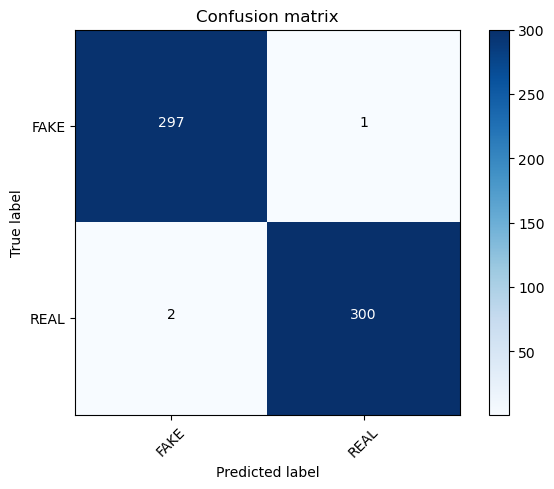

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(cm, classes=['FAKE', 'REAL'])

In [ ]:
import pickle
pickle.dump(pac, open('pac_model1.pkl', 'wb'))
pickle.dump(tfidf, open('tfidf.pkl', 'wb'))

NameError: name 'pac' is not defined

In [ ]:
#validate on the unseen data
import pickle
import re
#data preprocessing
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
import re
import nltk
# nltk.download('stopwords')
article_a = "A new study from the World Health Organization (WHO) confirms that regular physical activity reduces the risk of heart disease by up to 30%. The study involved 15,000 participants across 10 countries and was published in the International Journal of Cardiology."
article_b = "Experts have revealed shocking news exercising might actually be dangerous! A viral online post claims that too much exercise could increase heart problems. Thousands of people are now rethinking their daily fitness routines."
new_article = "Trump says Russia probe will be fair, but timeline unclear"
model = pickle.load(open('pac_model1.pkl', 'rb'))
tfidf = pickle.load(open('tfidf.pkl', 'rb'))

def preprocess(article, tfidf):
    test_review = re.sub('^[A-Za-z]', " ", article)
    test_review = test_review.lower().split()
    test_review = [ps.stem(word) for word in test_review if word not in stopwords.words('english')]
    test_review = ' '.join(test_review)
    test_review = tfidf.transform([test_review])
    return test_review
def predict(article, article_no, model, tfidf):
    test_review = preprocess(article, tfidf)
    pred_score = model.predict(test_review)[0]
    print(f"{article_no} : {pred_score}")
    if pred_score == 0 :
        print("fake news")
    else:
        print("real news")

predict(article_a, "article_a", model, tfidf)
predict(article_b, "article_b", model, tfidf)
predict(new_article, "new_article", model, tfidf)

article_a : 1
real news
article_b : 0
fake news
new_article : 1
real news
